##Import all needed packages.

In [4]:
!pip install metpy

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import metpy.calc as mpcalc
from metpy.plots import SkewT
from metpy.units import units
import numpy as np

##Import the radiosonde file.

Make sure to upload the file in the 'Files' folder if using Google Colab.

In [6]:
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

df = pd.read_csv('/content/sample_data/CLASS_231006_1600.txt',skiprows=6, names=col_names)
df

,pressure,height,temperature,dewpoint,direction,speed
0,1015.00,233.00,17.00,2.59,270.00,1.94
1,990.75,438.74,16.36,0.41,289.32,14.00
2,986.60,474.37,16.04,0.68,288.96,15.31
3,982.72,507.76,15.58,0.08,288.58,15.85
4,980.32,528.49,15.23,0.12,287.90,15.86
...,...,...,...,...,...,...
596,309.25,9273.91,-43.52,-48.37,249.24,95.94
597,308.60,9288.10,-43.66,-48.44,249.33,96.32
598,307.95,9302.39,-43.65,-48.31,249.42,96.85
599,307.19,9318.97,-44.07,-48.54,249.47,97.32


Check for any NaN values and drop those rows.

In [7]:
df = df.dropna().astype(float)
df

,pressure,height,temperature,dewpoint,direction,speed
0,1015.00,233.00,17.00,2.59,270.00,1.94
1,990.75,438.74,16.36,0.41,289.32,14.00
2,986.60,474.37,16.04,0.68,288.96,15.31
3,982.72,507.76,15.58,0.08,288.58,15.85
4,980.32,528.49,15.23,0.12,287.90,15.86
...,...,...,...,...,...,...
595,309.96,9258.58,-43.26,-48.11,249.11,95.32
596,309.25,9273.91,-43.52,-48.37,249.24,95.94
597,308.60,9288.10,-43.66,-48.44,249.33,96.32
598,307.95,9302.39,-43.65,-48.31,249.42,96.85


Get needed variables and assign units to them.

In [8]:
p = df['pressure'].values * units.hPa
T = df['temperature'].values * units.degC
Td = df['dewpoint'].values * units.degC
wind_speed = df['speed'].values * units.knots
wind_dir = df['direction'].values * units.degrees

Calculate for the u- and v-components of wind.

In [9]:
u, v = mpcalc.wind_components(wind_speed, wind_dir)

##Plot variables on a Skew-T plot.

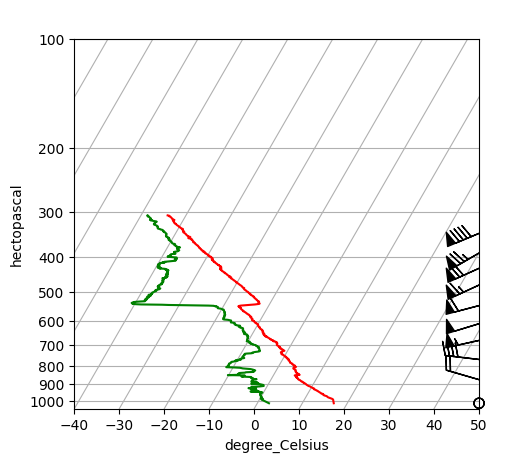

In [10]:
fig = plt.figure()
skew = SkewT(fig)

skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::60], u[::60], v[::60])

plt.show()

You can also use MetPy to calculate other thermodynamic variables, such as LCL, CAPE, CIN, etc., and the parcel path of an air parcel rising adiabatically from the surface.

In [11]:
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
lcl_pressure, lcl_temperature

(817.209133878032 <Unit('hectopascal')>,
 -0.42341113995826163 <Unit('degree_Celsius')>)

In [12]:
parcel_prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')

In [13]:
cape, cin = mpcalc.cape_cin(p, T, Td, parcel_prof)
cape, cin

(0 <Unit('joule / kilogram')>, 0 <Unit('joule / kilogram')>)

You can also plot the parcel profile and mark the LCL in the Skew-T plot.

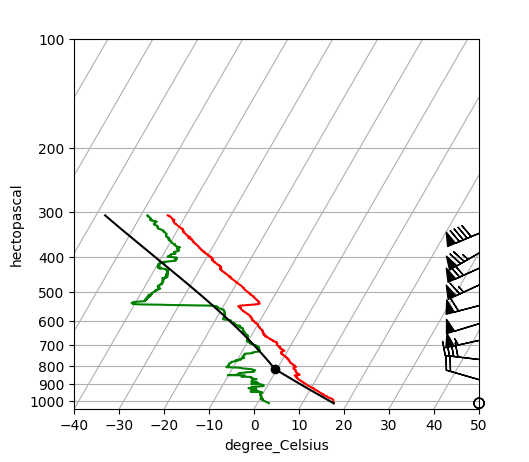

In [14]:
fig = plt.figure()
skew = SkewT(fig)

skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::60], u[::60], v[::60])

# Plot LCL temperature as black dot
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Plot the parcel profile as a black line
skew.plot(p, parcel_prof, 'k')

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, parcel_prof, Td)
skew.shade_cape(p, T, parcel_prof)

You can further add the dry and moist adiabats to your Skew-T plot.

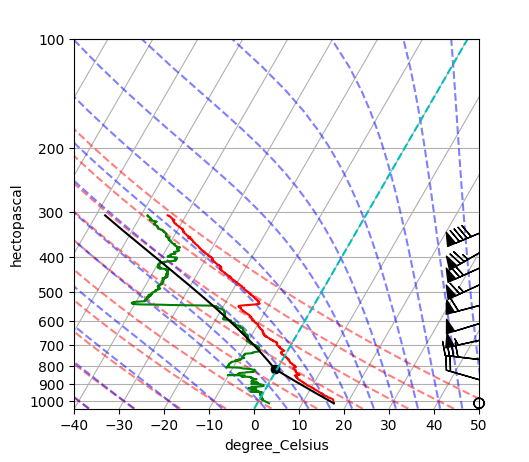

In [15]:
fig = plt.figure()
skew = SkewT(fig)

skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::60], u[::60], v[::60])

# Plot LCL temperature as black dot
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# Plot the parcel profile as a black line
skew.plot(p, parcel_prof, 'k')

# Shade areas of CAPE and CIN
skew.shade_cin(p, T, parcel_prof, Td)
skew.shade_cape(p, T, parcel_prof)

# Plot a zero degree isotherm
skew.ax.axvline(0, color='c', linestyle='--')

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()

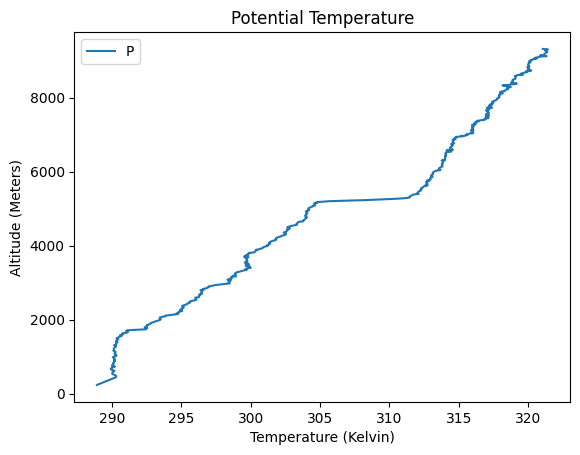

In [29]:
df['potential temperature'] = (df['temperature'] + 273.15) * (1000/df['pressure'])**(.286)
potential_temperature = df['potential temperature'].values * units.kelvin

plt.plot(potential_temperature, df['height'])
plt.title('Potential Temperature')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Altitude (Meters)')
plt.legend('P')

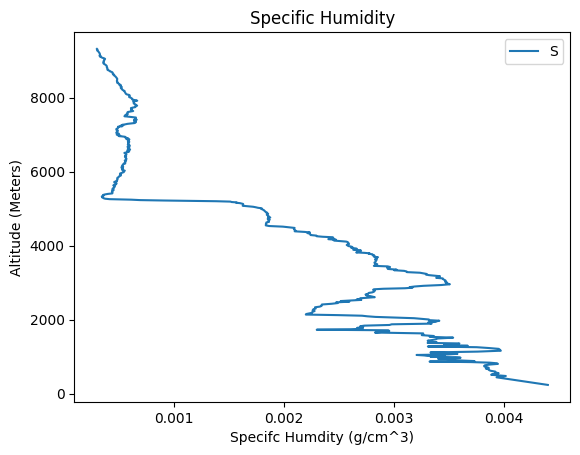

In [34]:
df['e'] = 6.11 * 10 ** ((7.5*df['dewpoint'])/(273.15 + df['dewpoint']))
e = df['e'].values*units.hPa
df['specific humidity'] = .622 * df['e']/ df['pressure']


plt.plot(df['specific humidity'], df['height'])
plt.title('Specific Humidity')
plt.xlabel('Specifc Humdity (g/cm^3)')
plt.ylabel('Altitude (Meters)')
plt.legend('Specific humidity')

Text(0, 0.5, 'altitude (meters)')

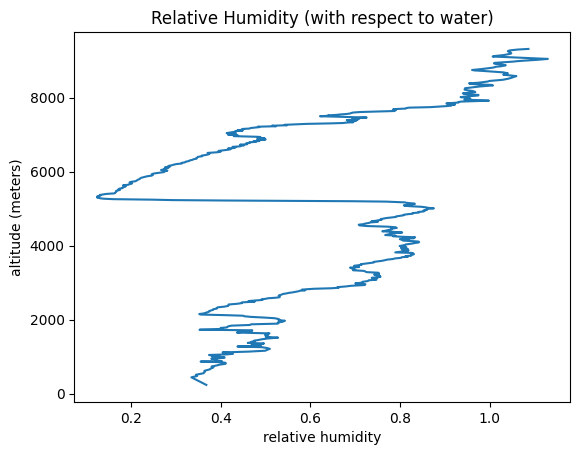

In [37]:
df['es'] = 6.11 * np.exp(((2.5 * 10**6/461.5))*((1/273.15-1/(df['temperature']+273.15))))
es = df['es']
df['RH (water)'] = e/es

plt.plot(df['RH (water)'], df['height'])
plt.title('Relative Humidity (with respect to water)')
plt.xlabel('relative humidity')
plt.ylabel('altitude (meters)')

Text(0, 0.5, 'Height')

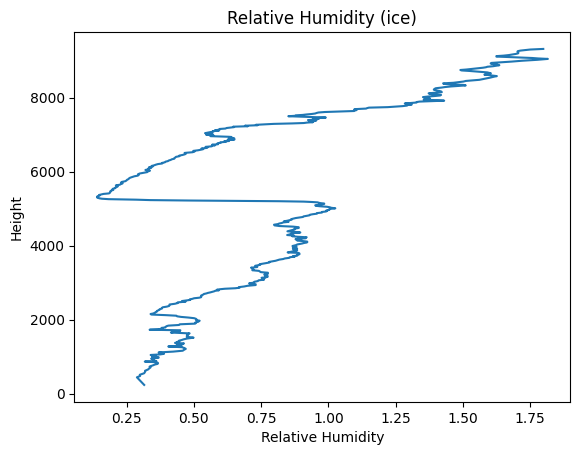

In [39]:
df['esi'] = 6.11* np.exp(((2.83 * 10**6/461.5))*((1/273.15-1/(df['temperature']+273.15))))
esi = df['esi']
df['Relative_H (ice)'] = e/esi

plt.plot(df['Relative_H (ice)'], df['height'])
plt.title('Relative Humidity (ice)')
plt.xlabel('Relative Humidity')
plt.ylabel('Height')

Text(0, 0.5, 'altitude (meters)')

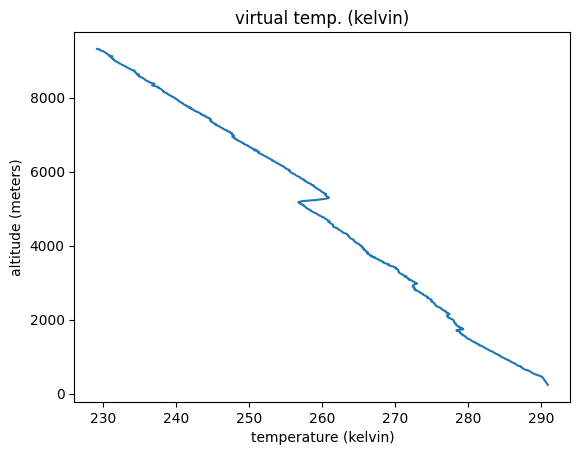

In [41]:
df['virtual_temp'] = (df['temperature']+ 273.15)*(1 + .622 * df['specific humidity'])
virtual_temp = df['virtual_temp'].values*units.kelvin
plt.plot(virtual_temp, df['height'])
plt.title('virtual temp. (kelvin)')
plt.xlabel('temperature (kelvin)')
plt.ylabel('altitude (meters)')

Text(0, 0.5, 'altitude (meters)')

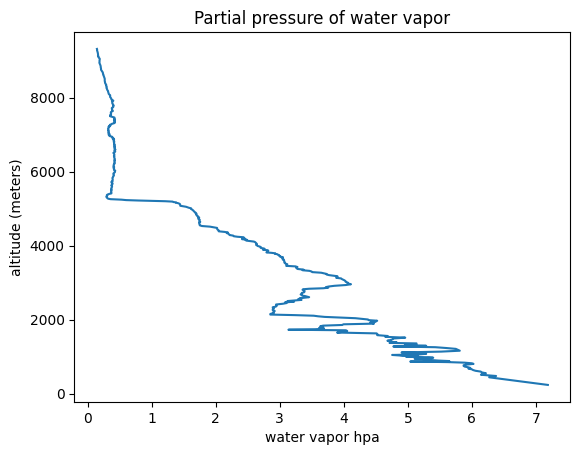

In [44]:
df['e'] = 6.11*10**((7.5*df['dewpoint'])/(273.15+df['dewpoint']))
e = df['e'].values*units.hPa

plt.plot(e, df['height'])
plt.title('Partial pressure of water vapor')
plt.xlabel('water vapor hpa')
plt.ylabel('altitude (meters)')

Text(0, 0.5, 'altitude (meters)')

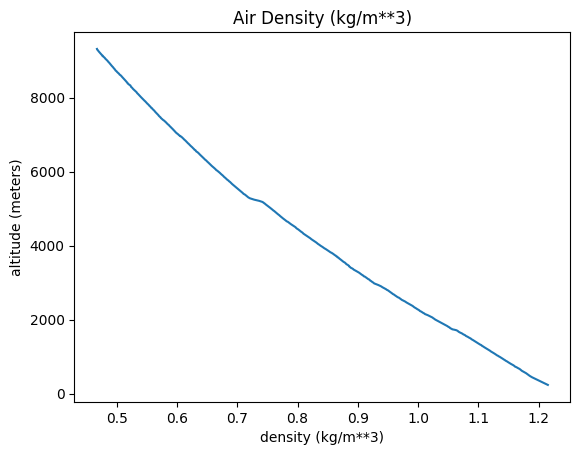

In [45]:
df['rho'] = df['pressure'] * 100/(287.05*df['virtual_temp'])
rho = df['rho'].values*units.kilogram / units.meter ** 3

plt.plot(rho, df['height'])
plt.title('Air Density (kg/m**3)')
plt.xlabel('density (kg/m**3)')
plt.ylabel('altitude (meters)')